In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import numpy as np
import calendar

warnings.filterwarnings('ignore')

In [15]:
df = pd.read_excel('./online_retail_II.xlsx', 
                   sheet_name=0
                  )

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
# convert Customer id to string
df['Customer ID'] = df['Customer ID'].apply(lambda x : f'{x:.0f}')

In [19]:
df['Customer ID'].dtypes

dtype('O')

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [21]:
# cleaning data
df.isnull().sum()

Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

In [28]:
df.dropna(axis=0, inplace=True)

In [29]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [36]:
df[df['Customer ID'] == 'nan'].shape

(104999, 8)

In [37]:
df.drop(labels=df[df['Customer ID'] == 'nan'].index, inplace=True)

In [38]:
df[df['Customer ID'] == 'nan']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [39]:
df.shape

(417534, 8)

### Exploratory data analysis 🗺

In [43]:
# get total number of order
total_orders = df.groupby(by='Customer ID').nunique()
total_orders.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
Customer ID,,,,,,,
12346,15,29,28,6,15,14,1
12347,2,70,70,10,2,21,1
12348,1,20,20,3,1,5,1
12349,4,92,97,14,4,33,1
12351,1,21,21,6,1,11,1


In [47]:
# percntage of customers who've made more than one order
more_than_one_order = np.sum(total_orders['Invoice'] > 1) / df['Customer ID'].nunique() * 100
more_than_one_order

71.09285877253024

In [48]:
# percntage of customers who've made more than one order
more_than_two_order = np.sum(total_orders['Invoice'] > 2) / df['Customer ID'].nunique() * 100
more_than_two_order

53.45653661875428

 - Here we find that 71% of customers ordered more than once and 53% have ordered more than twice. 

In [69]:
sns.set_style('dark')

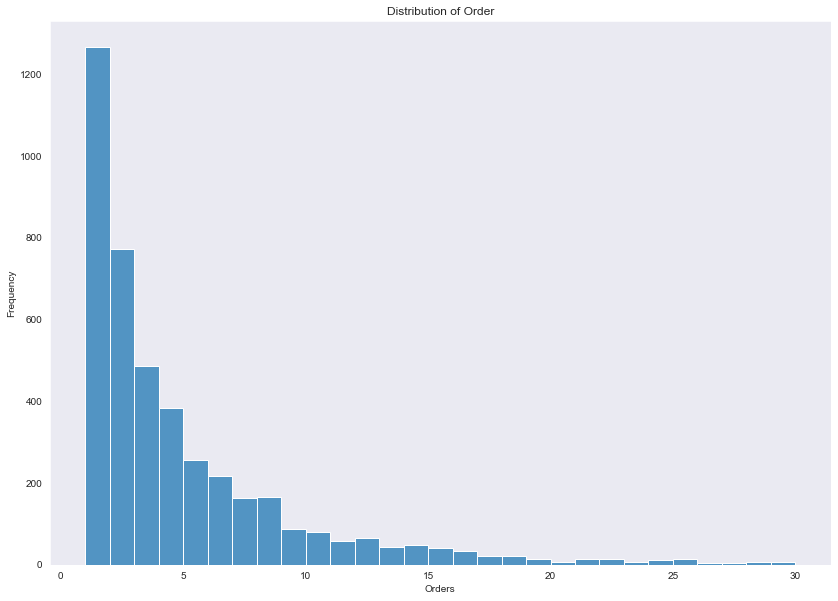

In [71]:
plt.figure(figsize=(14,10))
sns.histplot(data=total_orders, x='Invoice', bins=100,binwidth=1, binrange=(1,30))
plt.title('Distribution of Order')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.show()

In [54]:
total_orders['Invoice'].min(), total_orders['Invoice'].max()

(1, 270)

In [55]:
total_orders['Invoice'].value_counts()

1      1267
2       773
3       486
4       383
5       256
       ... 
46        1
50        1
41        1
126       1
159       1
Name: Invoice, Length: 69, dtype: int64

### Creating Cohorts 👥

In [72]:
df['UnitPrice'] = df['Quantity'] * df['Price']

In [73]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'UnitPrice'],
      dtype='object')

In [77]:
df = df[['Invoice', 'Customer ID', 'InvoiceDate', 'UnitPrice']]
df.head(10)

,Invoice,Customer ID,InvoiceDate,UnitPrice
0,489434,13085,2009-12-01 07:45:00,83.4
1,489434,13085,2009-12-01 07:45:00,81.0
2,489434,13085,2009-12-01 07:45:00,81.0
3,489434,13085,2009-12-01 07:45:00,100.8
4,489434,13085,2009-12-01 07:45:00,30.0
5,489434,13085,2009-12-01 07:45:00,39.6
6,489434,13085,2009-12-01 07:45:00,30.0
7,489434,13085,2009-12-01 07:45:00,59.5
8,489435,13085,2009-12-01 07:46:00,30.6
9,489435,13085,2009-12-01 07:46:00,45.0


In [76]:
df[df.duplicated()]

,Invoice,Customer ID,InvoiceDate,UnitPrice
2,489434,13085,2009-12-01 07:45:00,81.00
6,489434,13085,2009-12-01 07:45:00,30.00
11,489435,13085,2009-12-01 07:46:00,30.60
19,489436,13078,2009-12-01 09:06:00,19.80
25,489436,13078,2009-12-01 09:06:00,25.20
...,...,...,...,...
525455,538171,17530,2010-12-09 20:01:00,2.50
525456,538171,17530,2010-12-09 20:01:00,5.90
525457,538171,17530,2010-12-09 20:01:00,3.75
525458,538171,17530,2010-12-09 20:01:00,3.75


In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.shape

(253751, 4)

In [80]:
df.head()

,Invoice,Customer ID,InvoiceDate,UnitPrice
0,489434,13085,2009-12-01 07:45:00,83.4
1,489434,13085,2009-12-01 07:45:00,81.0
3,489434,13085,2009-12-01 07:45:00,100.8
4,489434,13085,2009-12-01 07:45:00,30.0
5,489434,13085,2009-12-01 07:45:00,39.6


### to Create Cohort
 - find the minimum invoice Date (Chort Month)
 - find the months that each customer make purchase in

In [81]:
df['Cohort Month'] = df.groupby(by='Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')
df['Order Month'] = df['InvoiceDate'].dt.to_period('M')

In [103]:
df.sample(10)

,Invoice,Customer ID,InvoiceDate,UnitPrice,Cohort Month,Order Month
420108,529585,14911,2010-10-28 19:37:00,30.60,2009-12,2010-10
520545,537770,15529,2010-12-08 12:24:00,7.80,2010-11,2010-12
211509,509913,15900,2010-05-26 11:27:00,1.65,2010-05,2010-05
402970,527960,14618,2010-10-19 16:57:00,19.80,2010-06,2010-10
69119,495512,16700,2010-01-25 14:25:00,17.00,2009-12,2010-01
392493,527110,14817,2010-10-14 17:23:00,25.20,2009-12,2010-10
476402,534188,17085,2010-11-21 14:13:00,4.65,2009-12,2010-11
111681,500093,15910,2010-03-04 12:13:00,1.65,2010-01,2010-03
291331,517746,17049,2010-08-02 09:14:00,25.50,2010-03,2010-08
1795,489593,12836,2009-12-01 14:19:00,25.20,2009-12,2009-12


In [123]:
# we can agg cohort and order month and count number of unique customer in each group
cohort = df.groupby(by=['Cohort Month', 'Order Month']).\
        agg(n_customers=('Customer ID', 'nunique'), total_spent = ('UnitPrice', 'sum')).\
        reset_index(drop=False)

In [124]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Cohort Month  91 non-null     period[M]
 1   Order Month   91 non-null     period[M]
 2   n_customers   91 non-null     int64    
 3   total_spent   91 non-null     float64  
dtypes: float64(1), int64(1), period[M](2)
memory usage: 3.0 KB


In [128]:
cohort.head()

,Cohort Month,Order Month,n_customers,total_spent
0,2009-12,2009-12,1045,483023.220
1,2009-12,2010-01,392,276317.271
2,2009-12,2010-02,358,206672.772
3,2009-12,2010-03,447,278780.180
4,2009-12,2010-04,410,219736.850


In [134]:
cohort['Period Number'] = (cohort['Order Month'] - cohort['Cohort Month']).apply(attrgetter('n'))

In [135]:
cohort.head(10)

,Cohort Month,Order Month,n_customers,total_spent,Period Number
0,2009-12,2009-12,1045,483023.220,0
1,2009-12,2010-01,392,276317.271,1
2,2009-12,2010-02,358,206672.772,2
3,2009-12,2010-03,447,278780.180,3
4,2009-12,2010-04,410,219736.850,4
5,2009-12,2010-05,408,208002.460,5
6,2009-12,2010-06,408,226578.890,6
7,2009-12,2010-07,374,218917.840,7
8,2009-12,2010-08,355,232859.480,8
9,2009-12,2010-09,392,261144.170,9


In [133]:
cohort['Cohort Month'].dtypes, cohort['Order Month'].dtypes

(period[M], period[M])

In [136]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   Cohort Month   91 non-null     period[M]
 1   Order Month    91 non-null     period[M]
 2   n_customers    91 non-null     int64    
 3   total_spent    91 non-null     float64  
 4   Period Number  91 non-null     int64    
dtypes: float64(1), int64(2), period[M](2)
memory usage: 3.7 KB


In [148]:
# Converts timestamps into calendar dates
cohort['Cohort Month'] = cohort['Cohort Month'].apply(
    lambda row: f"{calendar.month_abbr[int(str(row).split('-')[1])]} {str(row).split('-')[0]}"
)

In [150]:
cohort['Order Month'] = cohort['Order Month'].apply(
    lambda row : f"{calendar.month_abbr[int(str(row).split('-')[1])]} {str(row).split('-')[0]}"
)

In [151]:
cohort.head()

,Cohort Month,Order Month,n_customers,total_spent,Period Number
0,Dec 2009,Dec 2009,1045,483023.220,0
1,Dec 2009,Jan 2010,392,276317.271,1
2,Dec 2009,Feb 2010,358,206672.772,2
3,Dec 2009,Mar 2010,447,278780.180,3
4,Dec 2009,Apr 2010,410,219736.850,4


### Retention Matrix
- retention matrix will show us how user activity changes over time for each of our cohorts.

In [163]:
retention = cohort.pivot_table(index='Cohort Month', columns='Period Number', values='n_customers')

In [164]:
retention

Period Number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,,
Apr 2010,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,22.0,NaN,NaN,NaN,NaN
Aug 2010,158.0,39.0,50.0,51.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dec 2009,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,452.0,518.0,260.0
Dec 2010,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb 2010,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,32.0,NaN,NaN
Jan 2010,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,122.0,37.0,NaN
Jul 2010,183.0,38.0,37.0,52.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jun 2010,269.0,58.0,53.0,55.0,62.0,76.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
Mar 2010,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,36.0,NaN,NaN,NaN


In [173]:
columns = cohort['Order Month'].unique().tolist()
retention = retention.reindex(labels=columns)

In [174]:
retention

Period Number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,,
Dec 2009,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,452.0,518.0,260.0
Jan 2010,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,122.0,37.0,NaN
Feb 2010,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,32.0,NaN,NaN
Mar 2010,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,36.0,NaN,NaN,NaN
Apr 2010,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,22.0,NaN,NaN,NaN,NaN
May 2010,254.0,49.0,45.0,49.0,48.0,66.0,56.0,22.0,NaN,NaN,NaN,NaN,NaN
Jun 2010,269.0,58.0,53.0,55.0,62.0,76.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
Jul 2010,183.0,38.0,37.0,52.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug 2010,158.0,39.0,50.0,51.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
retention_absolute = pd.pivot_table(data=cohort, index='Cohort Month', columns='Order Month', values='n_customers')[columns]

In [198]:
retention_absolute = retention_absolute.reindex(labels=columns)
retention_absolute

Order Month,Dec 2009,Jan 2010,Feb 2010,Mar 2010,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010
Cohort Month,,,,,,,,,,,,,
Dec 2009,1045.0,392.0,358.0,447.0,410.0,408.0,408.0,374.0,355.0,392.0,452.0,518.0,260.0
Jan 2010,NaN,394.0,86.0,119.0,120.0,110.0,115.0,105.0,91.0,114.0,134.0,122.0,37.0
Feb 2010,NaN,NaN,363.0,109.0,82.0,110.0,93.0,76.0,79.0,103.0,100.0,106.0,32.0
Mar 2010,NaN,NaN,NaN,436.0,95.0,113.0,103.0,100.0,87.0,105.0,130.0,126.0,36.0
Apr 2010,NaN,NaN,NaN,NaN,291.0,67.0,58.0,47.0,54.0,67.0,79.0,76.0,22.0
May 2010,NaN,NaN,NaN,NaN,NaN,254.0,49.0,45.0,49.0,48.0,66.0,56.0,22.0
Jun 2010,NaN,NaN,NaN,NaN,NaN,NaN,269.0,58.0,53.0,55.0,62.0,76.0,20.0
Jul 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,38.0,37.0,52.0,55.0,21.0
Aug 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,39.0,50.0,51.0,20.0


In [176]:
cohort.columns

Index(['Cohort Month', 'Order Month', 'n_customers', 'total_spent',
       'Period Number'],
      dtype='object')

In [177]:
retention_price = pd.pivot_table(data=cohort, index='Cohort Month', columns='Period Number', values='total_spent')

In [178]:
retention_price 

Period Number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,,
Apr 2010,64683.621,11199.040,13118.270,18201.710,14941.57,20492.04,22219.21,21041.14,3369.870,NaN,NaN,NaN,NaN
Aug 2010,38095.200,9805.110,17321.370,16749.880,5530.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dec 2009,483023.220,276317.271,206672.772,278780.180,219736.85,208002.46,226578.89,218917.84,232859.480,261144.17,330377.61,434427.912,152868.86
Dec 2010,8905.810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb 2010,104304.283,21356.660,34974.170,34873.550,27126.74,25310.03,23661.04,32109.08,35669.320,39022.98,6702.60,NaN,NaN
Jan 2010,105129.151,27383.321,35719.770,39460.651,37522.67,44672.80,31172.39,28923.14,37968.251,54512.40,53744.40,10867.330,NaN
Jul 2010,47980.140,5281.630,8955.330,15825.310,19041.46,4822.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jun 2010,40358.210,6940.430,14997.680,15806.630,20557.01,33285.78,7595.16,NaN,NaN,NaN,NaN,NaN,NaN
Mar 2010,103923.651,30890.930,31362.120,36732.050,30380.95,35446.32,41599.23,52270.20,50918.500,10476.55,NaN,NaN,NaN


In [179]:
columns = cohort['Order Month'].unique().tolist()
retention_price = retention_price.reindex(labels=columns)

In [180]:
retention_price

Period Number,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,,
Dec 2009,483023.220,276317.271,206672.772,278780.180,219736.85,208002.46,226578.89,218917.84,232859.480,261144.17,330377.61,434427.912,152868.86
Jan 2010,105129.151,27383.321,35719.770,39460.651,37522.67,44672.80,31172.39,28923.14,37968.251,54512.40,53744.40,10867.330,NaN
Feb 2010,104304.283,21356.660,34974.170,34873.550,27126.74,25310.03,23661.04,32109.08,35669.320,39022.98,6702.60,NaN,NaN
Mar 2010,103923.651,30890.930,31362.120,36732.050,30380.95,35446.32,41599.23,52270.20,50918.500,10476.55,NaN,NaN,NaN
Apr 2010,64683.621,11199.040,13118.270,18201.710,14941.57,20492.04,22219.21,21041.14,3369.870,NaN,NaN,NaN,NaN
May 2010,77164.620,10691.520,9869.900,9299.620,11796.66,21556.08,15465.18,2877.77,NaN,NaN,NaN,NaN,NaN
Jun 2010,40358.210,6940.430,14997.680,15806.630,20557.01,33285.78,7595.16,NaN,NaN,NaN,NaN,NaN,NaN
Jul 2010,47980.140,5281.630,8955.330,15825.310,19041.46,4822.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug 2010,38095.200,9805.110,17321.370,16749.880,5530.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
def matrix_of_retention(pivoted_table, matrix_type):

    metric = 'cohort size'
    cohort_size = pivoted_table.iloc[:,0].tolist()
    label = 'period since initial purchase'


    if matrix_type.lower() == 'relative':
        title = 'Monthly Cohorts: Relative User Retention'

    elif matrix_type.lower() == 'absolute':
        cohort_size = np.diag(pivoted_table)
        label = 'order month'
        title = 'Monthly Cohorts: Absolute User Retention'

    elif matrix_type.lower() == 'price':
        metric = "total spent"
        title = 'Monthly Cohorts: User Spending'
    else:
        raise ValueError("Invalid matrix type. Options are [relative, absolute, price]")
    
    
    retention_matrix = pivoted_table.divide(cohort_size, axis = 0)
    return retention_matrix, metric, label, title, cohort_size


In [190]:
def plot_retention(pivoted_table, matrix_type):

    retention_matrix, metric, label, title, cohort_size = matrix_of_retention(pivoted_table, matrix_type)

    # actual plot code
    with sns.axes_style("white"):
        if matrix_type != 'price':
            fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=False, gridspec_kw={'width_ratios': [1, 11]})
            
            # retention matrix
            sns.heatmap(retention_matrix, 
                        mask=retention_matrix.isnull(), 
                        annot=True, 
                        fmt='.0%', 
                        cmap='RdYlGn', 
                        ax=ax[1])
            ax[1].set_title(title, fontsize=16)
            ax[1].set(xlabel= label,
                    ylabel='cohort')

            # cohort size
            cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: f'{metric}'})
            white_cmap = mcolors.ListedColormap(['white'])
            sns.heatmap(cohort_size_df, 
                        annot=True, 
                        cbar=False,
                        yticklabels=False, 
                        fmt='g', 
                        cmap=white_cmap, 
                        ax=ax[0])
        else:
            fig = plt.figure(figsize=(12, 8))
            sns.heatmap(retention_matrix, 
                        mask=retention_matrix.isnull(), 
                        annot=True, 
                        fmt='.0%', 
                        cmap='RdYlGn')

        fig.tight_layout()

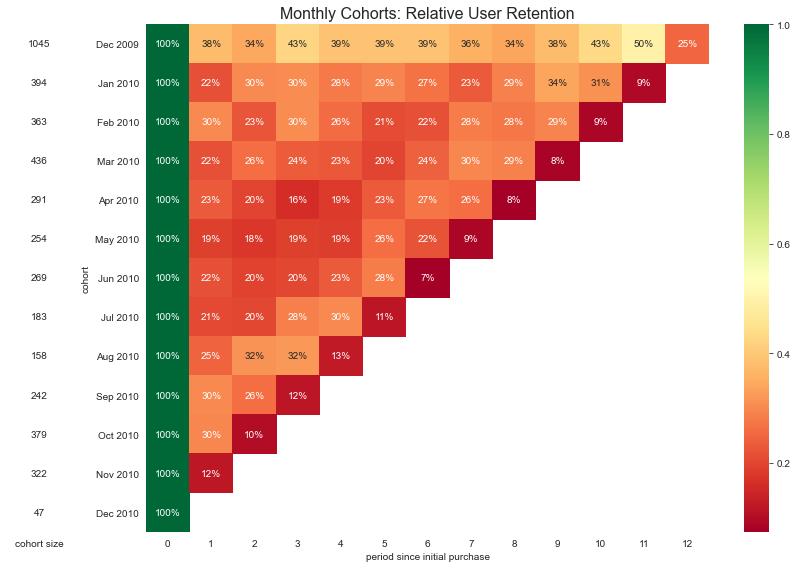

In [191]:
plot_retention(retention, 'relative')

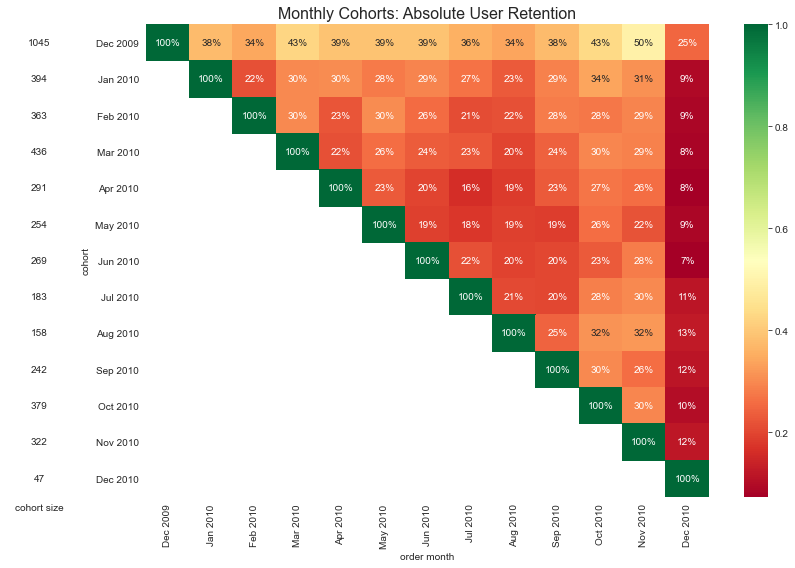

In [199]:
plot_retention(retention_absolute, 'absolute')

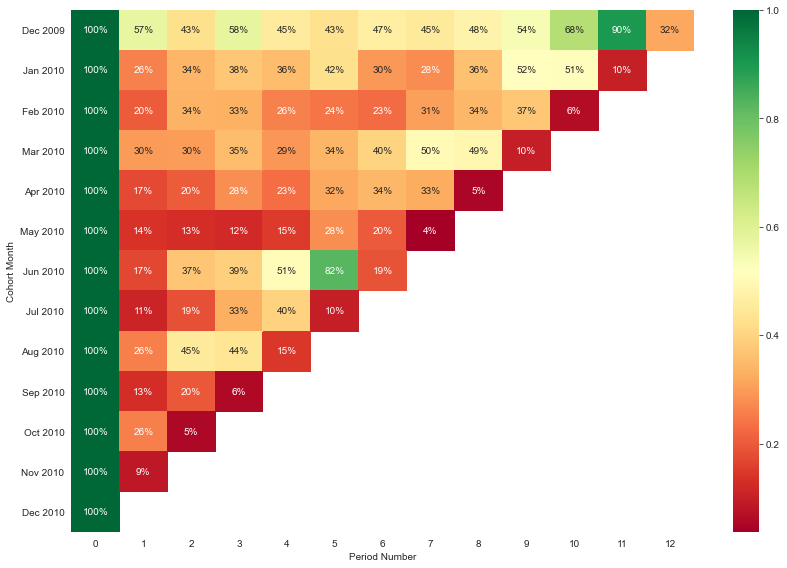

In [192]:
plot_retention(retention_price, 'price')